In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os



In [60]:
cifar_fp_icarl_nme = []
cifar_fp_icarl_cnn = []
cifar_fp_lwf_cnn = []
cifar_fp_bic_nme = []

cifar_ours_lwf = []
cifar_ours_icarl_nme = []
cifar_ours_icarl_cnn = []
cifar_ours_icarl_nme = []
cifar_ours_icarl_cnn = []

In [61]:
dsads_fp_icarl_nme = [99.875,  97.625,  95.2765, 89.3865,  88.359,  85.194,  82.8105,  79.6875,  77.416,  76.3815]
dsads_fp_icarl_cnn = [99.9165,  97.208,  92.1245,  85.5625,  84.433,  80.944,  78.566,  74.8805,  73.422,  72.8265]
dsads_fp_lwf_cnn = [99.9165,  69.666,  46.4305,  30.5835,  23.232,  17.896,  16.363,  14.047,  12.811,  12.0565]
dsads_fp_bic_nme = [99.792,  97.749,  92.736,  86.958,  85.558,  81.5965,  78.679,  75.5415,  73.3845,  71.468]
dsads_fp_bic_cnn = [99.75,  97.625,  92.4575,  85.261,  85.2495,  82.0275,  76.5425,  74.287,  72.149,  70.1395]

dsads_ours_lwf = [99.875,  68.8545,  49.389,  33.458,  25.0075,  19.7095,  16.864,  15.089,  13.1435,  12.333]
dsads_ours_icarl_nme = [99.7085,  96.3125,  93.9865,  88.3125,  87.2425,  83.854,  81.2145,  79.7455,  77.236,  77.192]
dsads_ours_icarl_cnn = [99.875,  96.667,  92.167,  85.4165,  84.818,  79.513,  77.4935,  74.9115,  72.694,  72.7365]
dsads_ours_bic_nme = [99.667,  93.666,  94,  84.334,  83.334,  79.64,  73.762,  67.438,  69.092,  67.51]
dsads_ours_bic_cnn = [99.9585,  96.9785,  92.07,  84.7395,  83.3915,  80.2845,  74.071,  71.057,  69.464,  67.6225]

In [62]:
pamap_fp_lwf_cnn = [98.511,  69.985,  54.49,  44.3545,  40.023,  36.3395]
pamap_fp_icarl_nme = [98.607,  95.4885,  91.7805,  86.3215,  83.1715,  80.025]
pamap_fp_icarl_cnn = [98.511,  94.5975,  89.6315,  83.329,  79.2365,  77.518]
pamap_fp_bic_nme = [98.5585,  94.696,  89.814,  83.103,  79.6895,  76.3525]
pamap_fp_bic_cnn = [98.207,  95.1355,  89.6015,  81.851,  77.883,  77.551]

pamap_ours_lwf = [98.6035,  67.1725,  55.0345,  41.972,  35.699,  32.837]
pamap_ours_icarl_nme = [98.139,  94.671,  91.423,  85.2075,  82.8195,  79.9585]
pamap_ours_icarl_cnn = [98.6035,  94.5755,  89.0705,  81.9145,  80.0145, 77.8685]
pamap_ours_bic_nme = [98.0355,  94.304,  86.958,  79.82,  76.534,  74.67]
pamap_ours_bic_cnn = [98.407,  94.3035,  88.765,  81.55,  77.849,  75.605]

In [63]:
hapt_fp_lwf_cnn = [97.2275,  71.447,  55.859,  44.904,  35.65,  32.778]
hapt_fp_icarl_nme = [97.2185,  96.368,  93.265,  90.511,  87.1235,  85.7985]
hapt_fp_icarl_cnn = [97.2275,  96.125,  91.382,  88.611,  83.343,  82.98]
hapt_fp_bic_nme = [97.3415,  95.9915,  91.3175,  88.3865,  84.2105,  81.1315]
hapt_fp_bic_cnn = [97.2815,  95.8225,  91.2755,  87.9175,  83.5655,  80.8195]

hapt_ours_lwf = [97.0125,  73.5865,  53.7675,  39.3525,  31.106,  28.6475]
hapt_ours_icarl_nme = [96.7705,  96.154,  90.63,  89.6645,  85.593,  84.944]
hapt_ours_icarl_cnn = [97.0125,  95.805,  88.458,  87.432,  82.344,  82.562]
hapt_ours_bic_nme = [96.5225,  96.3815,  89.5675,  86.643,  81.3185,  78.7865]
hapt_ours_bic_cnn = [95.843,  96.01,  90.4005,  86.1635,  80.9215,  77.855]

## dsads

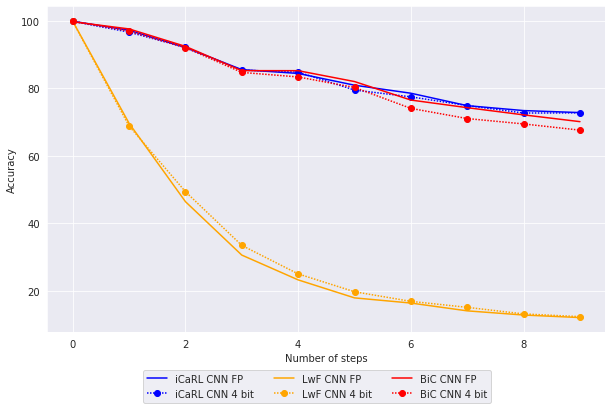

In [65]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(np.arange(len(dsads_fp_icarl_cnn)), dsads_fp_icarl_cnn,
            label='iCaRL CNN FP', color="blue")
    ax.plot(np.arange(len(dsads_ours_icarl_cnn)), dsads_ours_icarl_cnn,
            label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1])
    ax.plot(np.arange(len(dsads_fp_lwf_cnn)), dsads_fp_lwf_cnn,
            label='LwF CNN FP', color="orange")
    ax.plot(np.arange(len(dsads_ours_lwf)), dsads_ours_lwf,
            label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1])
    ax.plot(np.arange(len(dsads_fp_bic_cnn)), dsads_fp_bic_cnn,
            label='BiC CNN FP', color="red")
    ax.plot(np.arange(len(dsads_ours_bic_cnn)), dsads_ours_bic_cnn,
            label='BiC CNN 4 bit', color="red", marker='o', dashes=[1])
    ax.set_xlabel('Number of steps')
    ax.set_ylabel('Accuracy')
    
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

## pamap

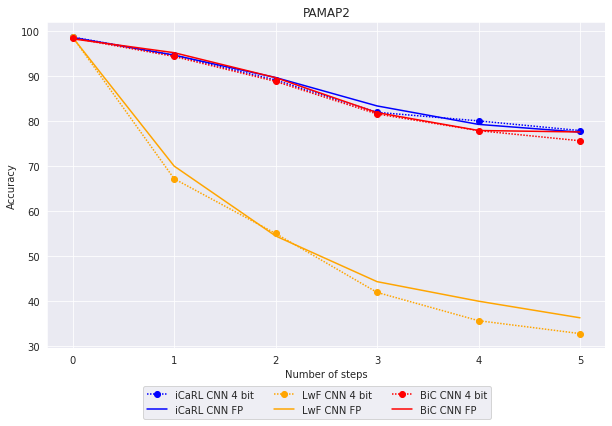

In [66]:
with sns.axes_style('darkgrid'):
        fig, ax = plt.subplots(figsize=(10, 6))
        
        ax.plot(np.arange(len(pamap_ours_icarl_cnn)), pamap_ours_icarl_cnn,
                label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1])
        ax.plot(np.arange(len(pamap_fp_icarl_cnn)), pamap_fp_icarl_cnn,
                label='iCaRL CNN FP', color="blue")
        ax.plot(np.arange(len(pamap_ours_lwf)), pamap_ours_lwf,
                label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1])
        ax.plot(np.arange(len(pamap_fp_lwf_cnn)), pamap_fp_lwf_cnn,
                label='LwF CNN FP', color="orange")
        ax.plot(np.arange(len(pamap_ours_bic_cnn)), pamap_ours_bic_cnn,
                label='BiC CNN 4 bit', color="red", marker='o', dashes=[1])
        ax.plot(np.arange(len(pamap_fp_bic_cnn)), pamap_fp_bic_cnn,
                label='BiC CNN FP', color="red")
        ax.set_xlabel('Number of steps')
        ax.set_ylabel('Accuracy')
        ax.set_title('PAMAP2')
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

## hapt

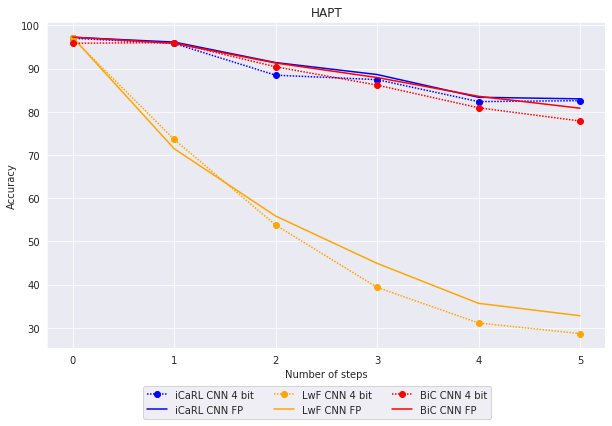

In [67]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(np.arange(len(hapt_ours_icarl_cnn)), hapt_ours_icarl_cnn,
            label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1])
    ax.plot(np.arange(len(hapt_fp_icarl_cnn)), hapt_fp_icarl_cnn,
            label='iCaRL CNN FP', color="blue")
    ax.plot(np.arange(len(hapt_ours_lwf)), hapt_ours_lwf,
            label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1])
    ax.plot(np.arange(len(hapt_fp_lwf_cnn)), hapt_fp_lwf_cnn,
            label='LwF CNN FP', color="orange")
    ax.plot(np.arange(len(hapt_ours_bic_cnn)), hapt_ours_bic_cnn,
            label='BiC CNN 4 bit', color="red", marker='o', dashes=[1])
    ax.plot(np.arange(len(hapt_fp_bic_cnn)), hapt_fp_bic_cnn,
            label='BiC CNN FP', color="red")
    ax.set_xlabel('Number of steps')
    ax.set_ylabel('Accuracy')
    ax.set_title('HAPT')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)
    

# combined

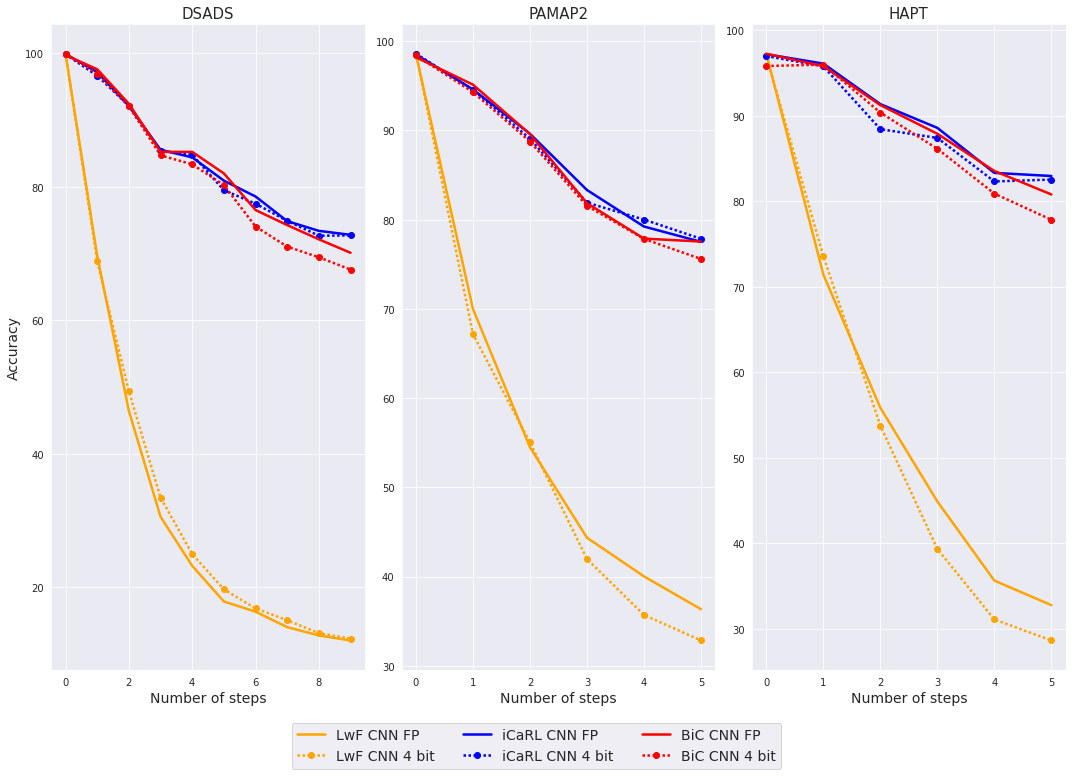

In [98]:
fontsize = 14
linewidth = 2.5
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    axes[0].plot(np.arange(len(dsads_fp_lwf_cnn)), dsads_fp_lwf_cnn,
                    label='LwF CNN FP', color="orange", linewidth=linewidth)
    axes[0].plot(np.arange(len(dsads_ours_lwf)), dsads_ours_lwf,
                    label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1],
                    linewidth=linewidth)
    axes[0].plot(np.arange(len(dsads_fp_icarl_cnn)), dsads_fp_icarl_cnn,
                    label='iCaRL CNN FP', color="blue", linewidth=linewidth)
    axes[0].plot(np.arange(len(dsads_ours_icarl_cnn)), dsads_ours_icarl_cnn,
                    label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1],
                    linewidth=linewidth)
    axes[0].plot(np.arange(len(dsads_fp_bic_cnn)), dsads_fp_bic_cnn,
                    label='BiC CNN FP', color="red", linewidth=linewidth)
    axes[0].plot(np.arange(len(dsads_ours_bic_cnn)), dsads_ours_bic_cnn,
                    label='BiC CNN 4 bit', color="red", marker='o', dashes=[1],
                    linewidth=linewidth)
    axes[0].set_xlabel('Number of steps', fontsize=fontsize)
    axes[0].set_ylabel('Accuracy', fontsize=fontsize)
    axes[0].set_title('DSADS', fontsize=fontsize+1)

    axes[1].plot(np.arange(len(pamap_ours_lwf)), pamap_ours_lwf,
                    label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1],
                    linewidth=linewidth)
    axes[1].plot(np.arange(len(pamap_fp_lwf_cnn)), pamap_fp_lwf_cnn,
                    label='LwF CNN FP', color="orange", linewidth=linewidth)
    axes[1].plot(np.arange(len(pamap_ours_icarl_cnn)), pamap_ours_icarl_cnn,
                    label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1],
                    linewidth=linewidth)
    axes[1].plot(np.arange(len(pamap_fp_icarl_cnn)), pamap_fp_icarl_cnn,
                    label='iCaRL CNN FP', color="blue", linewidth=linewidth)
    axes[1].plot(np.arange(len(pamap_ours_bic_cnn)), pamap_ours_bic_cnn,
                    label='BiC CNN 4 bit', color="red", marker='o', dashes=[1],
                    linewidth=linewidth)
    axes[1].plot(np.arange(len(pamap_fp_bic_cnn)), pamap_fp_bic_cnn,
                    label='BiC CNN FP', color="red", linewidth=linewidth)
    axes[1].set_xlabel('Number of steps', fontsize=fontsize)
    #axes[1].set_ylabel('Accuracy')
    axes[1].set_title('PAMAP2', fontsize=fontsize+1)

    axes[2].plot(np.arange(len(hapt_ours_lwf)), hapt_ours_lwf,
                    label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1],
                    linewidth=linewidth)
    axes[2].plot(np.arange(len(hapt_fp_lwf_cnn)), hapt_fp_lwf_cnn,
                    label='LwF CNN FP', color="orange", linewidth=linewidth)
    axes[2].plot(np.arange(len(hapt_ours_icarl_cnn)), hapt_ours_icarl_cnn,
                    label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1],
                    linewidth=linewidth)
    axes[2].plot(np.arange(len(hapt_fp_icarl_cnn)), hapt_fp_icarl_cnn,
                    label='iCaRL CNN FP', color="blue", linewidth=linewidth)
    axes[2].plot(np.arange(len(hapt_ours_bic_cnn)), hapt_ours_bic_cnn,
                    label='BiC CNN 4 bit', color="red", marker='o', dashes=[1],
                    linewidth=linewidth)
    axes[2].plot(np.arange(len(hapt_fp_bic_cnn)), hapt_fp_bic_cnn,
                    label='BiC CNN FP', color="red", linewidth=linewidth)
    axes[2].set_xlabel('Number of steps', fontsize=fontsize)
    #axes[2].set_ylabel('Accuracy')
    axes[2].set_title('HAPT', fontsize=fontsize+1)

    # add legen for overall fig
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.00),
               ncol=3, fontsize=fontsize)
    plt.tight_layout()

    # save fig
    fig.savefig('figures/HAR_accuracy.pdf', bbox_inches='tight')


# errorbars

In [93]:
dsads_fp_lwf_cnn_std = [0.37, 6.45, 7.21, 7.93, 8.12, 8.12, 5.99, 6.15, 4.24, 4.84]
dsads_fp_icarl_cnn_std = [0.37, 22.38, 15.11, 11.28, 8.18, 6.01, 5.83, 5.62, 6.41, 6.01]
dsads_fp_bic_cnn_std = [0.94, 5.45, 7.00, 8.88, 8.16, 7.73, 7.12, 7.71, 5.95, 5.61]
dsads_ours_lwf_std = [0.41, 23.27, 17.97, 9.30, 7.57, 7.42, 7.65, 7.44, 8.15, 7.68,]
dsads_ours_icarl_cnn_std = [0.41, 6.96, 6.43, 7.62, 8.67, 8.22, 7.88, 6.66, 4.67, 4.59]
dsads_ours_bic_cnn_std = [0.19, 7.05, 7.32, 8.56, 8.19, 8.77, 8.67, 8.48, 5.09, 6.96]

pamap_fp_lwf_cnn_std = [1.21, 16.77, 13.11, 11.73, 8.96, 8.03]
pamap_fp_icarl_cnn_std = [1.21, 6.50, 7.80, 4.98, 7.61, 5.50]
pamap_fp_bic_cnn_std = [1.45, 3.79, 6.30, 7.75, 6.56, 6.10]
pamap_ours_lwf_std = [0.99, 15.95, 16.09, 14.27, 11.34, 10.25]
pamap_ours_icarl_cnn_std = [0.99, 5.89, 7.31, 5.90, 6.46, 5.02]
pamap_ours_bic_cnn_std = [1.19, 5.21, 6.98, 7.10, 5.89, 6.66]

hapt_fp_lwf_cnn_std = [7.64, 20.30, 16.06, 9.35, 9.16, 8.74]
hapt_fp_icarl_cnn_std = [7.64, 5.62, 6.35, 4.08, 5.94, 5.12]
hapt_fp_bic_cnn_std = [7.37, 4.62, 5.73, 6.13, 5.53, 4.32]
hapt_ours_lwf_std = [8.89, 18.84, 16.41, 14.89, 10.37, 10.22]
hapt_ours_icarl_cnn_std = [8.89, 5.70, 9.61, 4.98, 5.61, 4.51]
hapt_ours_bic_cnn_std = [11.53, 5.16, 6.58, 4.61, 5.33, 3.93]


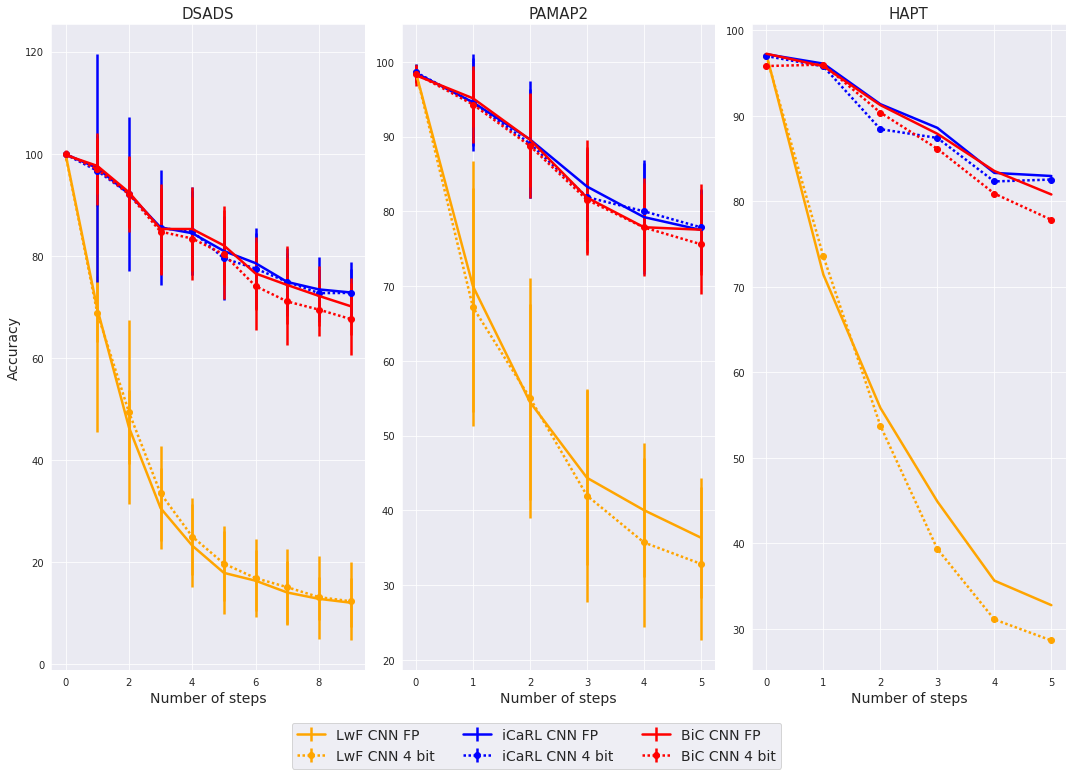

In [97]:


fontsize = 14
linewidth = 2.5
with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(1, 3, figsize=(15, 10))
    axes[0].errorbar(np.arange(len(dsads_fp_lwf_cnn)), dsads_fp_lwf_cnn,
                     yerr=dsads_fp_lwf_cnn_std, label='LwF CNN FP',
                     color="orange", linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_ours_lwf)), dsads_ours_lwf,
                        yerr=dsads_ours_lwf_std, label='LwF CNN 4 bit',
                        color="orange", marker='o', dashes=[1], linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_fp_icarl_cnn)), dsads_fp_icarl_cnn,
                        yerr=dsads_fp_icarl_cnn_std, label='iCaRL CNN FP',
                        color="blue", linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_ours_icarl_cnn)), dsads_ours_icarl_cnn,
                        yerr=dsads_ours_icarl_cnn_std, label='iCaRL CNN 4 bit',
                        color="blue", marker='o', dashes=[1], linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_fp_bic_cnn)), dsads_fp_bic_cnn,
                        yerr=dsads_fp_bic_cnn_std, label='BiC CNN FP',
                        color="red", linewidth=linewidth)
    axes[0].errorbar(np.arange(len(dsads_ours_bic_cnn)), dsads_ours_bic_cnn,
                        yerr=dsads_ours_bic_cnn_std, label='BiC CNN 4 bit',
                        color="red",  marker='o', dashes=[1], linewidth=linewidth)
    axes[0].set_xlabel('Number of steps', fontsize=fontsize)
    axes[0].set_ylabel('Accuracy', fontsize=fontsize)
    axes[0].set_title('DSADS', fontsize=fontsize+1)

    axes[1].errorbar(np.arange(len(pamap_ours_lwf)), pamap_ours_lwf,
                        yerr=pamap_ours_lwf_std, label='LwF CNN 4 bit',
                        marker='o', dashes=[1],
                        color="orange", linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_fp_lwf_cnn)), pamap_fp_lwf_cnn,
                        yerr=pamap_fp_lwf_cnn_std, label='LwF CNN FP',
                        color="orange",linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_ours_icarl_cnn)), pamap_ours_icarl_cnn,
                        yerr=pamap_ours_icarl_cnn_std, label='iCaRL CNN 4 bit',
                        marker='o', dashes=[1], 
                        color="blue", linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_fp_icarl_cnn)), pamap_fp_icarl_cnn,
                        yerr=pamap_fp_icarl_cnn_std, label='iCaRL CNN FP',
                        color="blue", linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_ours_bic_cnn)), pamap_ours_bic_cnn,
                        yerr=pamap_ours_bic_cnn_std, label='BiC CNN 4 bit',
                        marker='o', dashes=[1],
                        color="red",linewidth=linewidth)
    axes[1].errorbar(np.arange(len(pamap_fp_bic_cnn)), pamap_fp_bic_cnn,
                        yerr=pamap_fp_bic_cnn_std, label='BiC CNN FP',
                        color="red", linewidth=linewidth)
    axes[1].set_xlabel('Number of steps', fontsize=fontsize)
    #axes[1].set_ylabel('Accuracy')
    axes[1].set_title('PAMAP2', fontsize=fontsize+1)

    axes[2].errorbar(np.arange(len(hapt_ours_lwf)), hapt_ours_lwf,
                        label='LwF CNN 4 bit', color="orange", marker='o', dashes=[1],
                        linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_fp_lwf_cnn)), hapt_fp_lwf_cnn,
                        label='LwF CNN FP', color="orange", linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_ours_icarl_cnn)), hapt_ours_icarl_cnn,
                        label='iCaRL CNN 4 bit', color="blue", marker='o', dashes=[1],
                        linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_fp_icarl_cnn)), hapt_fp_icarl_cnn,
                        label='iCaRL CNN FP', color="blue", linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_ours_bic_cnn)), hapt_ours_bic_cnn,
                        label='BiC CNN 4 bit', color="red", marker='o', dashes=[1],
                        linewidth=linewidth)
    axes[2].errorbar(np.arange(len(hapt_fp_bic_cnn)), hapt_fp_bic_cnn,
                        label='BiC CNN FP', color="red", linewidth=linewidth)
    axes[2].set_xlabel('Number of steps', fontsize=fontsize)
    #axes[2].set_ylabel('Accuracy')
    axes[2].set_title('HAPT', fontsize=fontsize+1)

    # add legen for overall fig
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.00),
               ncol=3, fontsize=fontsize)
    plt.tight_layout()